In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Veriyi yükleyin
veri_seti = pd.read_csv("ibb-wi-fi-noktalar-yllara-gore-kullanc-says.csv", sep=';', encoding="latin1")

print("Sütun Adları:")
print(veri_seti.columns)

# Veri setinin genel durumunu kontrol edin
print("Veri Setinin İlk 5 Satırı:")
print(veri_seti.head())

# Veri türlerini kontrol edin
print("\nVeri Türleri:")
print(veri_seti.dtypes)

# Eksik değerleri kontrol edin
print("\nEksik Değer Sayısı:")
print(veri_seti.isnull().sum())

Sütun Adları:
Index(['Konum', '2019', '2020', '2021'], dtype='object')
Veri Setinin İlk 5 Satırı:
          Konum      2019     2020   2021
0     PDM Fatih         8        0      0
1    IETT-O3041    509771    71799   1710
2  ISKI-Esenler   1504313  1243715  11428
3          Null  25120646     4612    282
4    IETT-B5060    129208    38182    635

Veri Türleri:
Konum    object
2019      int64
2020      int64
2021      int64
dtype: object

Eksik Değer Sayısı:
Konum    0
2019     0
2020     0
2021     0
dtype: int64


# Veri Analizi Projesi: İBB Wi-Fi Kullanıcı Verileri Analizi

Bu proje, İBB Wi-Fi noktalarına ait kullanıcı sayılarının yıllara göre analizini içermektedir. Aşağıda veri analiz adımları detaylı olarak açıklanmıştır.

---

## 1. Veri Setini Yükleme ve Sütun Adlarını Kontrol Etme
Veri seti `ibb-wi-fi-noktalar-yllara-gore-kullanc-says.csv` dosyasından yüklenmiştir. Bu adımda, veri setinin doğru şekilde yüklendiğinden emin olunmuş ve sütun adları incelenmiştir.

```python
veri_seti = pd.read_csv("ibb-wi-fi-noktalar-yllara-gore-kullanc-says.csv", sep=';', encoding="latin1")
print("Sütun Adları:")
print(veri_seti.columns)








## 2. Veri Setinin İlk 5 Satırını İnceleme
Bu adımda, veri setinin ilk 5 satırı incelenir. Bu, verinin genel yapısını anlamak ve sütunlarda bulunan örnek değerleri görmek için kullanılır.

```python
print("Veri Setinin İlk 5 Satırı:")
print(veri_seti.head())


## 3. Veri Setini Yükleme ve Sütun Adlarını Kontrol Etme

Veri Türlerini Kontrol Etme
Her sütunun veri türü kontrol edilir. Eğer herhangi bir sütunda veri türüyle ilgili sorun varsa, bu adımda dönüşüm yapılması planlanabilir.

```python
print("\nVeri Türleri:")
print(veri_seti.dtypes)


## 4. Eksik Değer Sayısını Kontrol Etme
Veri setindeki eksik değerler analiz edilir. Her sütun için eksik değerlerin sayısı hesaplanır. Eksik değerler için doldurma veya temizleme stratejileri bir sonraki adımlarda uygulanabilir.

```python
print("\nEksik Değer Sayısı:")
print(veri_seti.isnull().sum())



Yıllara Göre Toplam Kullanıcı Sayısı:
2019    2718874859
2020     954887838
2021      18750116
dtype: int64


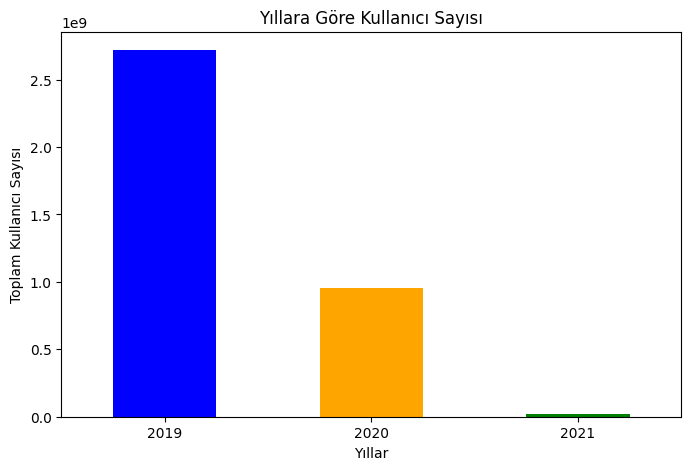

In [4]:
# Yıllara göre toplam kullanıcı sayısı
yillik_kullanicilar = veri_seti[['2019', '2020', '2021']].astype(int).sum()
print("\nYıllara Göre Toplam Kullanıcı Sayısı:")
print(yillik_kullanicilar)

# Yıllara göre kullanıcı sayısını görselleştirme
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
yillik_kullanicilar.plot(kind="bar", color=["blue", "orange", "green"])
plt.title("Yıllara Göre Kullanıcı Sayısı")
plt.xlabel("Yıllar")
plt.ylabel("Toplam Kullanıcı Sayısı")
plt.xticks(rotation=0)
plt.show()

Bu adımda, 2019, 2020 ve 2021 yıllarına ait toplam kullanıcı sayıları hesaplanmış ve bir bar grafiği ile görselleştirilmiştir. İlk olarak, veri setindeki ilgili yıllar seçilmiş, veri türü tamsayıya dönüştürülmüş ve her yılın toplamı alınmıştır. Daha sonra, yıllara göre kullanıcı sayılarının karşılaştırılabilir bir şekilde sunulması amacıyla bir bar grafiği oluşturulmuş, grafiğe başlık, eksen etiketleri ve uygun renklendirme eklenmiştir. Bu görselleştirme, kullanıcı sayılarındaki yıllık değişimlerin daha net bir şekilde analiz edilmesini sağlamaktadır.

```python
# Yıllara göre toplam kullanıcı sayısı
yillik_kullanicilar = veri_seti[['2019', '2020', '2021']].astype(int).sum()
print("\nYıllara Göre Toplam Kullanıcı Sayısı:")
print(yillik_kullanicilar)

# Yıllara göre kullanıcı sayısını görselleştirme
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
yillik_kullanicilar.plot(kind="bar", color=["blue", "orange", "green"])
plt.title("Yıllara Göre Kullanıcı Sayısı")
plt.xlabel("Yıllar")
plt.ylabel("Toplam Kullanıcı Sayısı")
plt.xticks(rotation=0)
plt.show()



En Çok Kullanılan İlk 10 Wi-Fi Noktası:
                             Konum  Toplam Kullanıcı
3246  017-Beyoglu Istiklal Caddesi          49156085
3084                       IETT-3G          46538110
2010            018-Eminonu Meydan          37728728
1404  017-Fatih Fevzi Pasa Caddesi          35521181
470     018-Zeytinburnu 58. Bulvar          31124539
2624            018-Kadikoy Meydan          30286214
4061            018-Esenler Meydan          30071497
3047        018-Sultanahmet Meydan          25585400
3                             Null          25125540
3900    067-Ilhan Varank Hastanesi          22562020


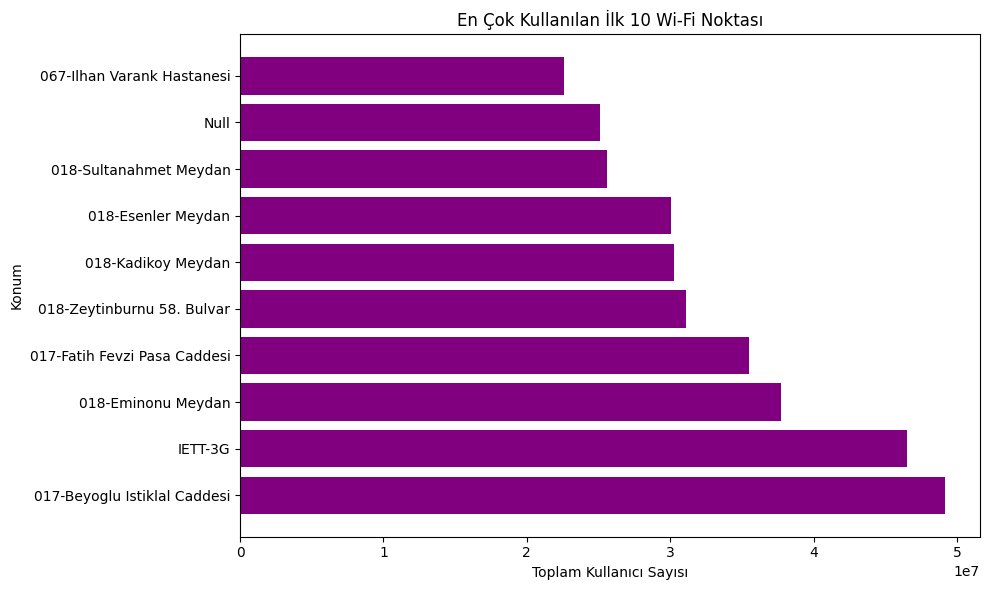

In [5]:
# En çok kullanılan ilk 10 Wi-Fi noktasını analiz etme
veri_seti['Toplam Kullanıcı'] = veri_seti[['2019', '2020', '2021']].sum(axis=1)
en_cok_kullanilan = veri_seti.nlargest(10, 'Toplam Kullanıcı')
print("\nEn Çok Kullanılan İlk 10 Wi-Fi Noktası:")
print(en_cok_kullanilan[['Konum', 'Toplam Kullanıcı']])

# En çok kullanılan lokasyonları görselleştirme
plt.figure(figsize=(10, 6))
plt.barh(en_cok_kullanilan['Konum'], en_cok_kullanilan['Toplam Kullanıcı'], color='purple')
plt.title("En Çok Kullanılan İlk 10 Wi-Fi Noktası")
plt.xlabel("Toplam Kullanıcı Sayısı")
plt.ylabel("Konum")
plt.tight_layout()
plt.show()

Bu adımda, 2019, 2020 ve 2021 yıllarına ait kullanıcı verileri kullanılarak her Wi-Fi noktasının toplam kullanıcı sayısı hesaplanmış ve en çok kullanılan ilk 10 Wi-Fi noktası belirlenmiştir. Veri setine yeni bir sütun eklenerek "Toplam Kullanıcı" değerleri hesaplanmış ve bu değere göre ilk 10 sıradaki Wi-Fi noktası seçilmiştir. Daha sonra, bu veriler yatay bir bar grafiği ile görselleştirilmiştir. Görselleştirme, lokasyonlara göre kullanıcı yoğunluğunu net bir şekilde ortaya koyarak, en popüler Wi-Fi noktalarını analiz etme imkanı sağlamaktadır.

```python
# En çok kullanılan ilk 10 Wi-Fi noktasını analiz etme
veri_seti['Toplam Kullanıcı'] = veri_seti[['2019', '2020', '2021']].sum(axis=1)
en_cok_kullanilan = veri_seti.nlargest(10, 'Toplam Kullanıcı')
print("\nEn Çok Kullanılan İlk 10 Wi-Fi Noktası:")
print(en_cok_kullanilan[['Konum', 'Toplam Kullanıcı']])

# En çok kullanılan lokasyonları görselleştirme
plt.figure(figsize=(10, 6))
plt.barh(en_cok_kullanilan['Konum'], en_cok_kullanilan['Toplam Kullanıcı'], color='purple')
plt.title("En Çok Kullanılan İlk 10 Wi-Fi Noktası")
plt.xlabel("Toplam Kullanıcı Sayısı")
plt.ylabel("Konum")
plt.tight_layout()
plt.show()


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Özellikler ve hedef değişken
X = veri_seti[['2019', '2020']].astype(int)  # Girdi özellikleri
y = veri_seti['2021'].astype(int)  # Hedef değişken

# Veriyi eğitim ve test setine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model oluşturma ve eğitme
model = LinearRegression()
model.fit(X_train, y_train)

# Tahmin yapma
y_pred = model.predict(X_test)

# Modelin değerlendirilmesi
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nLinear Regression Modeli - Mean Squared Error: {mse:.2f}, R2 Score: {r2:.2f}")

# Gerçek ve tahmin edilen değerleri karşılaştırma
tahmin_df = pd.DataFrame({'Gerçek Değerler': y_test, 'Tahmin Edilen Değerler': y_pred})
print("\nGerçek ve Tahmin Edilen Değerler:")
print(tahmin_df.head())


Linear Regression Modeli - Mean Squared Error: 15262356.16, R2 Score: 0.86

Gerçek ve Tahmin Edilen Değerler:
      Gerçek Değerler  Tahmin Edilen Değerler
2519              835              757.773812
2655             2884             1566.699680
2110             2268             1733.775016
151              2032             2099.024964
4189                0              471.696952


Bu adımda, 2019 ve 2020 yıllarına ait kullanıcı sayıları kullanılarak 2021 yılının kullanıcı sayısını tahmin etmek amacıyla bir lineer regresyon modeli oluşturulmuştur. İlk olarak, veri seti bağımsız değişkenler (`2019`, `2020`) ve bağımlı değişken (`2021`) olarak ayrılmıştır. Veri, eğitim ve test setlerine bölünmüş, ardından model eğitilmiştir. Modelin performansı `Mean Squared Error (MSE)` ve `R2 Score` metrikleri ile değerlendirilmiştir. Son olarak, test setindeki gerçek değerler ile tahmin edilen değerler karşılaştırılmıştır. Bu işlem, modelin doğruluğunu ölçmek ve tahminlerin kalitesini değerlendirmek için yapılmıştır.

```python
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Özellikler ve hedef değişken
X = veri_seti[['2019', '2020']].astype(int)  # Girdi özellikleri
y = veri_seti['2021'].astype(int)  # Hedef değişken

# Veriyi eğitim ve test setine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model oluşturma ve eğitme
model = LinearRegression()
model.fit(X_train, y_train)

# Tahmin yapma
y_pred = model.predict(X_test)

# Modelin değerlendirilmesi
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nLinear Regression Modeli - Mean Squared Error: {mse:.2f}, R2 Score: {r2:.2f}")

# Gerçek ve tahmin edilen değerleri karşılaştırma
tahmin_df = pd.DataFrame({'Gerçek Değerler': y_test, 'Tahmin Edilen Değerler': y_pred})
print("\nGerçek ve Tahmin Edilen Değerler:")
print(tahmin_df.head())


Linear Regression - Mean Squared Error: 15262356.16, R2 Score: 0.86
Decision Tree - Mean Squared Error: 33693129.84, R2 Score: 0.70
Random Forest - Mean Squared Error: 19475746.42, R2 Score: 0.83


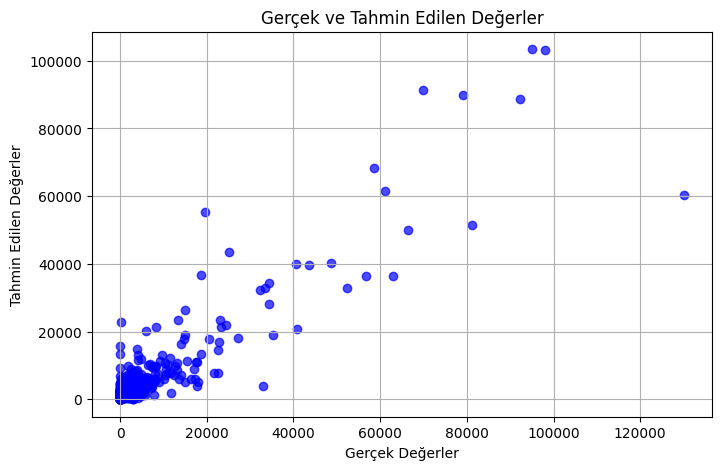

In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Modelleri tanımlama
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Modelleri eğitme ve değerlendirme
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - Mean Squared Error: {mse:.2f}, R2 Score: {r2:.2f}")


plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.title("Gerçek ve Tahmin Edilen Değerler")
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.grid(True)
plt.show()

Bu adımda, farklı regresyon modellerinin (Lineer Regresyon, Karar Ağacı, Rastgele Orman) performansını karşılaştırmak için bir değerlendirme yapılmıştır. Her bir model eğitilmiş ve test seti üzerinde tahminler yapılmıştır. Modellerin performansı `Mean Squared Error (MSE)` ve `R2 Score` metrikleri kullanılarak değerlendirilmiştir. Son olarak, gerçek ve tahmin edilen değerler bir scatter plot ile görselleştirilmiş, modelin tahmin doğruluğu grafiksel olarak analiz edilmiştir.

```python
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Modelleri tanımlama
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Modelleri eğitme ve değerlendirme
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - Mean Squared Error: {mse:.2f}, R2 Score: {r2:.2f}")

# Gerçek ve tahmin edilen değerler scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.title("Gerçek ve Tahmin Edilen Değerler")
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.grid(True)
plt.show()


Sütun Adları:
Index(['Konum', '2019', '2020', '2021'], dtype='object')
Veri Setinin İlk 5 Satırı:
          Konum      2019     2020   2021
0     PDM Fatih         8        0      0
1    IETT-O3041    509771    71799   1710
2  ISKI-Esenler   1504313  1243715  11428
3          Null  25120646     4612    282
4    IETT-B5060    129208    38182    635

Veri Türleri:
Konum    object
2019      int64
2020      int64
2021      int64
dtype: object

Eksik Değer Sayısı:
Konum    0
2019     0
2020     0
2021     0
dtype: int64

Yıllara Göre Toplam Kullanıcı Sayısı:
2019    2718874859
2020     954887838
2021      18750116
dtype: int64


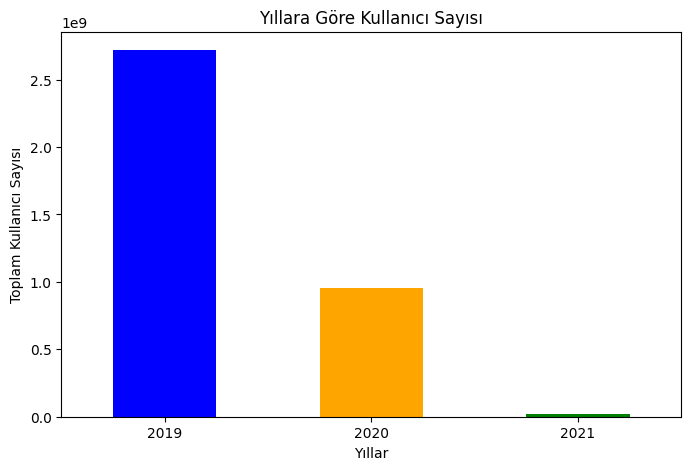


En Çok Kullanılan İlk 10 Wi-Fi Noktası:
                             Konum  Toplam Kullanıcı
3246  017-Beyoglu Istiklal Caddesi          49156085
3084                       IETT-3G          46538110
2010            018-Eminonu Meydan          37728728
1404  017-Fatih Fevzi Pasa Caddesi          35521181
470     018-Zeytinburnu 58. Bulvar          31124539
2624            018-Kadikoy Meydan          30286214
4061            018-Esenler Meydan          30071497
3047        018-Sultanahmet Meydan          25585400
3                             Null          25125540
3900    067-Ilhan Varank Hastanesi          22562020


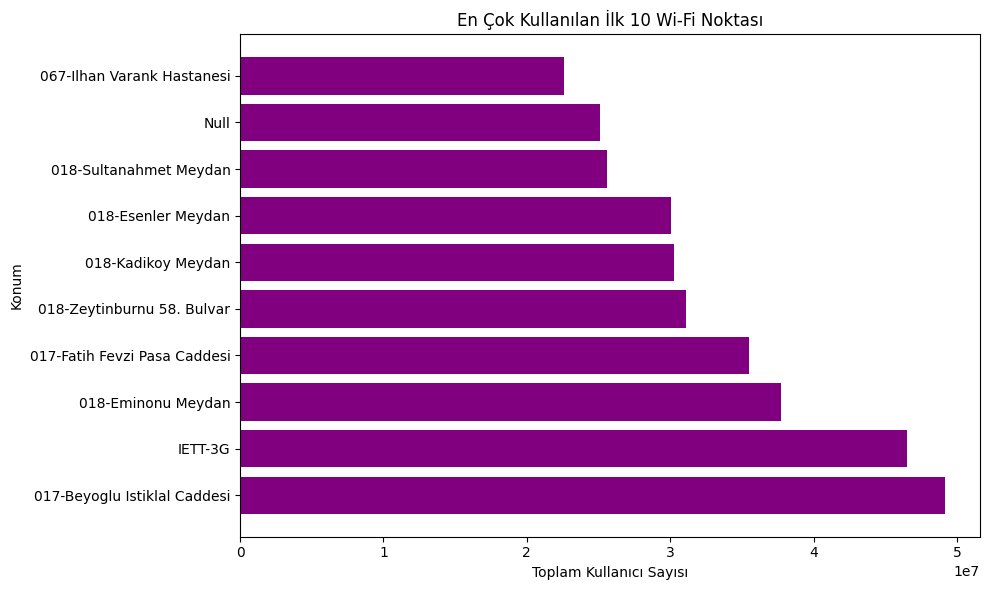


Linear Regression Modeli - Mean Squared Error: 15262356.16, R2 Score: 0.86

Gerçek ve Tahmin Edilen Değerler:
      Gerçek Değerler  Tahmin Edilen Değerler
2519              835              757.773812
2655             2884             1566.699680
2110             2268             1733.775016
151              2032             2099.024964
4189                0              471.696952
Linear Regression - Mean Squared Error: 15262356.16, R2 Score: 0.86
Decision Tree - Mean Squared Error: 33693129.84, R2 Score: 0.70
Random Forest - Mean Squared Error: 19475746.42, R2 Score: 0.83


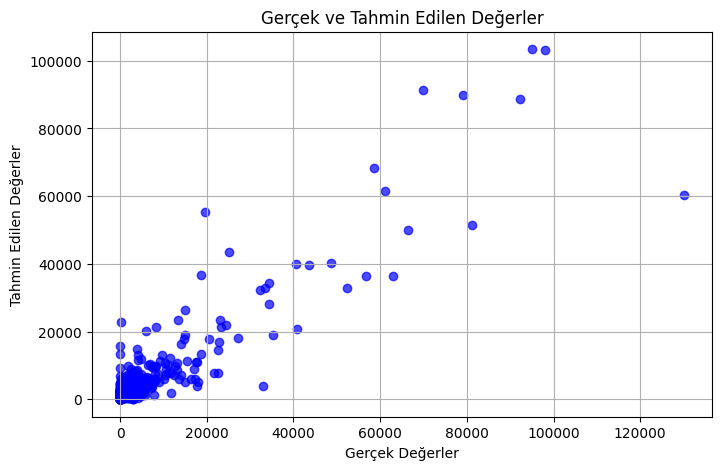

En İyi Parametreler: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest (Optimize Edilmiş) - MSE: 19467672.96, R2: 0.83


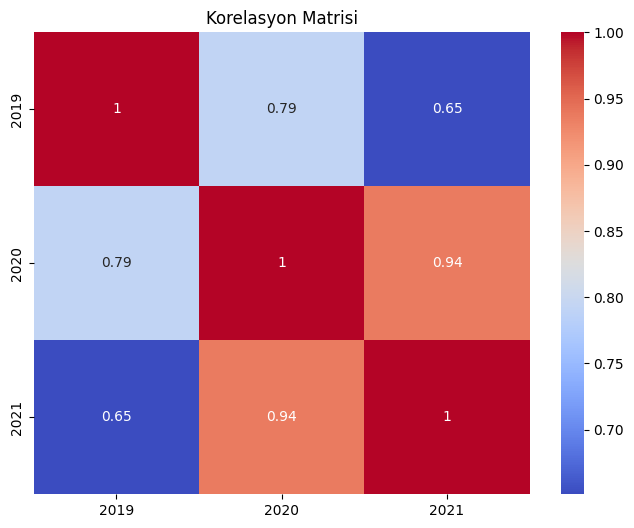

C:\Users\Mrlka\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25 () missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


ValueError: Image size of 846x93827 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x600 with 1 Axes>

Gelecek Yıllar için Tahmin:
2022: 787863865
2023: 865680331


C:\Users\Mrlka\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Mrlka\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Mrlka\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Mrlka\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few obse

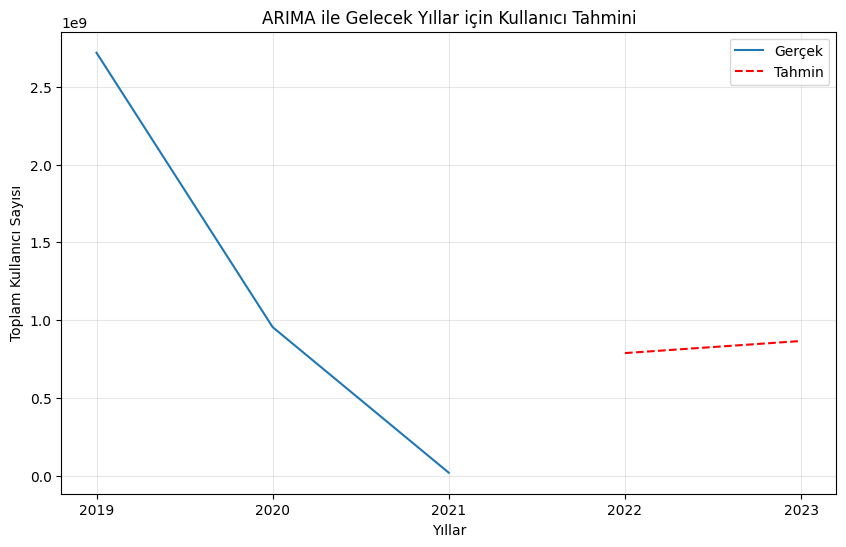

C:\Users\Mrlka\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
12:31:12 - cmdstanpy - INFO - Chain [1] start processing
12:31:12 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Mrlka\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


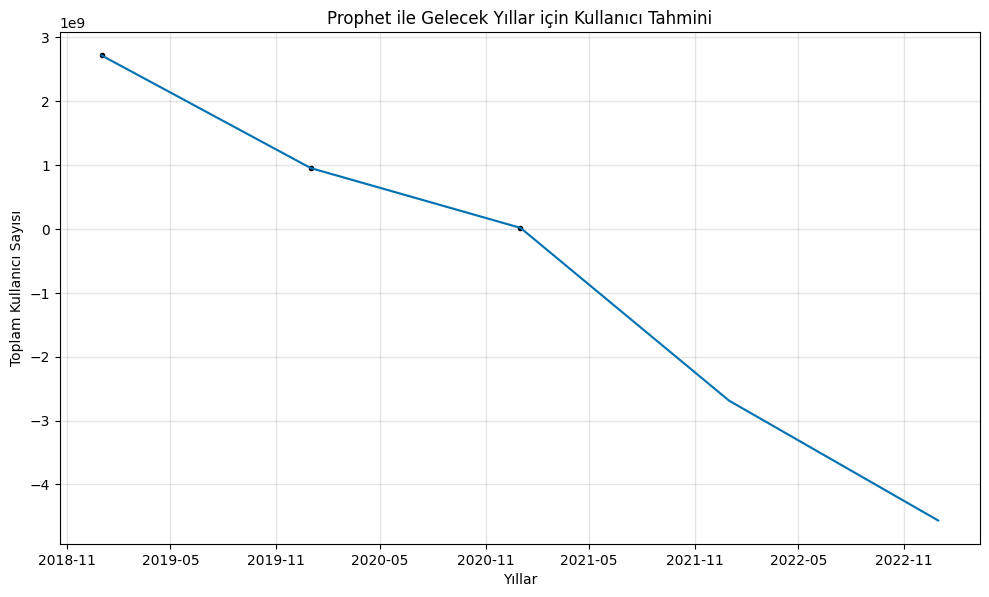

C:\Users\Mrlka\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(
12:31:13 - cmdstanpy - INFO - Chain [1] start processing


          ds          yhat    yhat_lower    yhat_upper
0 2019-01-01  2.718893e+09  2.718893e+09  2.718893e+09
1 2020-01-01  9.549057e+08  9.549057e+08  9.549057e+08
2 2021-01-01  1.876149e+07  1.876149e+07  1.876149e+07
3 2021-12-31 -2.687222e+09 -2.687222e+09 -2.687222e+09
4 2022-12-31 -4.564324e+09 -4.564325e+09 -4.564324e+09


12:31:13 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Mrlka\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


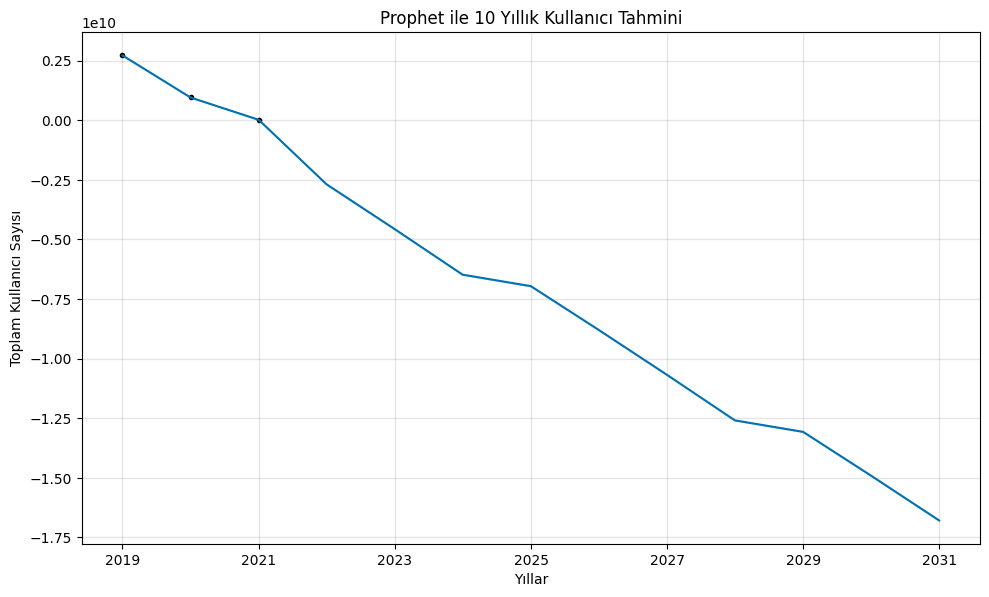

           ds          yhat    yhat_lower    yhat_upper
8  2026-12-31 -1.067625e+10 -1.067625e+10 -1.067625e+10
9  2027-12-31 -1.258989e+10 -1.258989e+10 -1.258989e+10
10 2028-12-31 -1.307114e+10 -1.307114e+10 -1.307114e+10
11 2029-12-31 -1.491107e+10 -1.491107e+10 -1.491107e+10
12 2030-12-31 -1.678818e+10 -1.678818e+10 -1.678818e+10


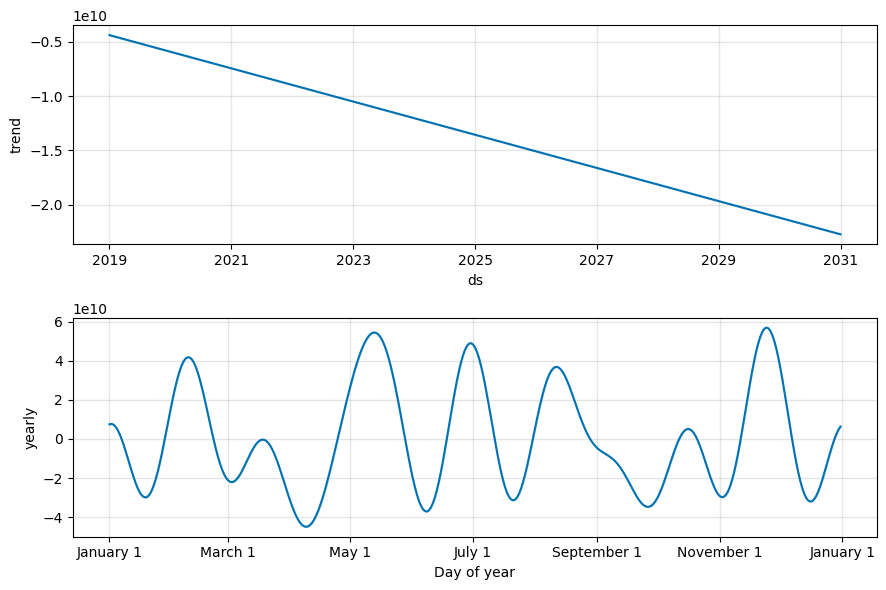

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Veriyi yükleyin
veri_seti = pd.read_csv("ibb-wi-fi-noktalar-yllara-gore-kullanc-says.csv", sep=';', encoding="latin1")

print("Sütun Adları:")
print(veri_seti.columns)

# Veri setinin genel durumunu kontrol edin
print("Veri Setinin İlk 5 Satırı:")
print(veri_seti.head())

# Veri türlerini kontrol edin
print("\nVeri Türleri:")
print(veri_seti.dtypes)

# Eksik değerleri kontrol edin
print("\nEksik Değer Sayısı:")
print(veri_seti.isnull().sum())


# Yıllara göre toplam kullanıcı sayısı
yillik_kullanicilar = veri_seti[['2019', '2020', '2021']].astype(int).sum()
print("\nYıllara Göre Toplam Kullanıcı Sayısı:")
print(yillik_kullanicilar)

# Yıllara göre kullanıcı sayısını görselleştirme
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
yillik_kullanicilar.plot(kind="bar", color=["blue", "orange", "green"])
plt.title("Yıllara Göre Kullanıcı Sayısı")
plt.xlabel("Yıllar")
plt.ylabel("Toplam Kullanıcı Sayısı")
plt.xticks(rotation=0)
plt.show()

# En çok kullanılan ilk 10 Wi-Fi noktasını analiz etme
veri_seti['Toplam Kullanıcı'] = veri_seti[['2019', '2020', '2021']].sum(axis=1)
en_cok_kullanilan = veri_seti.nlargest(10, 'Toplam Kullanıcı')
print("\nEn Çok Kullanılan İlk 10 Wi-Fi Noktası:")
print(en_cok_kullanilan[['Konum', 'Toplam Kullanıcı']])

# En çok kullanılan lokasyonları görselleştirme
plt.figure(figsize=(10, 6))
plt.barh(en_cok_kullanilan['Konum'], en_cok_kullanilan['Toplam Kullanıcı'], color='purple')
plt.title("En Çok Kullanılan İlk 10 Wi-Fi Noktası")
plt.xlabel("Toplam Kullanıcı Sayısı")
plt.ylabel("Konum")
plt.tight_layout()
plt.show()


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Özellikler ve hedef değişken
X = veri_seti[['2019', '2020']].astype(int)  # Girdi özellikleri
y = veri_seti['2021'].astype(int)  # Hedef değişken

# Veriyi eğitim ve test setine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model oluşturma ve eğitme
model = LinearRegression()
model.fit(X_train, y_train)

# Tahmin yapma
y_pred = model.predict(X_test)

# Modelin değerlendirilmesi
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nLinear Regression Modeli - Mean Squared Error: {mse:.2f}, R2 Score: {r2:.2f}")

# Gerçek ve tahmin edilen değerleri karşılaştırma
tahmin_df = pd.DataFrame({'Gerçek Değerler': y_test, 'Tahmin Edilen Değerler': y_pred})
print("\nGerçek ve Tahmin Edilen Değerler:")
print(tahmin_df.head())


from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Modelleri tanımlama
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Modelleri eğitme ve değerlendirme
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - Mean Squared Error: {mse:.2f}, R2 Score: {r2:.2f}")


plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.title("Gerçek ve Tahmin Edilen Değerler")
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.grid(True)
plt.show()

from sklearn.model_selection import GridSearchCV

# Hiperparametre ızgarası
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV ile en iyi parametreleri bulma
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)

print(f"En İyi Parametreler: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

# Tahmin ve değerlendirme
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Random Forest (Optimize Edilmiş) - MSE: {mse:.2f}, R2: {r2:.2f}")


plt.figure(figsize=(8, 6))
sns.heatmap(veri_seti[['2019', '2020', '2021']].corr(), annot=True, cmap='coolwarm')
plt.title("Korelasyon Matrisi")
plt.show()

veri_seti.set_index('Konum', inplace=True)
veri_seti[['2019', '2020', '2021']].T.plot(figsize=(10, 6))
plt.title("Yıllara Göre Kullanıcı Dağılımı")
plt.xlabel("Yıllar")
plt.ylabel("Kullanıcı Sayısı")
plt.grid(True)
plt.show()

################################################################################################

from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Yıllara göre toplam kullanıcı sayısını hazırlama
yillik_kullanicilar = veri_seti[['2019', '2020', '2021']].sum()

# ARIMA Modeli
model = ARIMA(yillik_kullanicilar, order=(1, 1, 1))  # (p, d, q) parametreleri
model_fit = model.fit()

# Tahmin yapma
forecast = model_fit.forecast(steps=2)  # 2 yıl için tahmin
print("Gelecek Yıllar için Tahmin:")
print(f"2022: {forecast[0]:.0f}")
print(f"2023: {forecast[1]:.0f}")

# Modelin tahminlerini ve gerçek değerleri görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(yillik_kullanicilar.index, yillik_kullanicilar, label="Gerçek")
plt.plot(['2022', '2023'], forecast, label="Tahmin", linestyle="--", color="red")
plt.title("ARIMA ile Gelecek Yıllar için Kullanıcı Tahmini")
plt.xlabel("Yıllar")
plt.ylabel("Toplam Kullanıcı Sayısı")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


from prophet import Prophet
import pandas as pd

# Prophet için veri setini hazırlama
df = yillik_kullanicilar.reset_index()
df.columns = ['ds', 'y']  # Prophet için tarih ve değer kolonlarını yeniden adlandır

# Prophet Modeli
model = Prophet()
model.fit(df)

# Gelecekteki yılları tahmin etme
future = model.make_future_dataframe(periods=2, freq='Y')  # 2 yıl için tahmin
forecast = model.predict(future)

# Tahmin sonuçlarını görselleştirme
fig = model.plot(forecast)
plt.title("Prophet ile Gelecek Yıllar için Kullanıcı Tahmini")
plt.xlabel("Yıllar")
plt.ylabel("Toplam Kullanıcı Sayısı")
plt.show()

# Tahmin sonuçlarını yazdırma
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


future = model.make_future_dataframe(periods=10, freq='Y')  # 10 yıl için tahmin


from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Yıllık kullanıcı verilerini Prophet formatına uygun hale getirme
yillik_kullanicilar = veri_seti[['2019', '2020', '2021']].sum().reset_index()
yillik_kullanicilar.columns = ['ds', 'y']  # Prophet'in gerektirdiği sütun adları

# Prophet Modeli
model = Prophet()
model.fit(yillik_kullanicilar)

# Gelecekteki yıllar için tahmin yapma
future = model.make_future_dataframe(periods=10, freq='Y')  # 10 yıllık tahmin
forecast = model.predict(future)

# Tahmin sonuçlarını görselleştirme
fig = model.plot(forecast)
plt.title("Prophet ile 10 Yıllık Kullanıcı Tahmini")
plt.xlabel("Yıllar")
plt.ylabel("Toplam Kullanıcı Sayısı")
plt.grid(True)
plt.show()

# Tahmin edilen son yılları yazdırma
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


# Tahmin bileşenlerini görselleştirme
fig2 = model.plot_components(forecast)
plt.show()


### Son Grafikleri Açıklama

1. **Korelasyon Matrisi (Heatmap)**:
   Bu grafik, 2019, 2020 ve 2021 yıllarına ait kullanıcı sayıları arasındaki ilişkinin gücünü ve yönünü görselleştirir. Kırmızıdan maviye değişen renkler, pozitif veya negatif korelasyon derecesini temsil eder. Örneğin, 2019 ile 2020 arasında güçlü bir pozitif ilişki varsa (korelasyon katsayısı 1'e yakınsa), bu yıllardaki kullanıcı artışlarının benzer bir trend izlediği anlamına gelir.

2. **Yıllara Göre Kullanıcı Dağılımı (Zamana Bağlı Çizgi Grafiği)**:
   Bu grafikte her Wi-Fi noktasındaki kullanıcı sayılarının 2019, 2020 ve 2021 yıllarındaki değişimleri gösterilmiştir. Çizgi grafiği, belirli Wi-Fi noktalarındaki kullanıcı yoğunluğundaki dalgalanmaları analiz etmeye olanak tanır.

3. **ARIMA ile Gelecek Yıllar için Kullanıcı Tahmini**:
   ARIMA modelini kullanarak yapılan 2022 ve 2023 yıllarına ait kullanıcı tahminleri gösterilmiştir. Gerçek değerler düz bir çizgiyle, tahmin edilen değerler ise kırmızı kesikli bir çizgiyle temsil edilmiştir. Grafik, modelin gelecekteki kullanıcı eğilimlerini nasıl projekte ettiğini açıklar.

4. **Prophet ile Gelecek Yıllar için Kullanıcı Tahmini (10 Yıl)**:
   Prophet modeli, gelecek 10 yıl için kullanıcı sayılarının tahminini yapar. Grafik, tahmin edilen kullanıcı sayılarının yıl bazında nasıl değişebileceğini gösterir. Prophet'in güven aralıkları (yhat_lower ve yhat_upper) de eklenerek, tahminlerin belirsizlik derecesi vurgulanmıştır.

5. **Prophet Bileşen Grafikleri**:
   Prophet modelinin bileşen analizi, kullanıcı verilerinin yıllık trendlerini, mevsimsel etkilerini ve kalıcı değişimlerini incelemek için kullanılır. Bu grafiklerde:
   - **Trend**: Kullanıcı sayısındaki genel artış veya azalma eğilimi.
   - **Mevsimsellik**: Yıllık veya aylık dönemlerde tekrar eden kullanıcı davranışları.
   - **Kalıntı (Residual)**: Model tarafından açıklanamayan rastgele varyasyonlar.

Bu grafikler, veri trendlerini derinlemesine analiz etmeyi ve gelecekteki kullanıcı davranışları hakkında öngörülerde bulunmayı kolaylaştırır.
